In [ ]:
import kagglehub
gtsrb_path = kagglehub.dataset_download('meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')
print(gtsrb_path)


/kaggle/input/gtsrb-german-traffic-sign


In [3]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow import keras
from keras import layers

import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import time
import datetime

from tqdm import tqdm

In [4]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in (range(classes)):
    path = os.path.join(r'D:\Soumil479\DNNs_On_FPGA\software_lenet\1','Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [6]:
data = data.astype('float32') / 255.0
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [7]:
model = Sequential([
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', name="CONV1"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="POOLING1"),
    layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu', name="CONV2"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="POOLING2"),
    layers.Flatten(),
    layers.Dense(64, activation='relu', name="FULLY1"),
    layers.Dense(43, activation='softmax', name="FULLY2"),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.weights
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CONV1 (Conv2D)              (None, 28, 28, 32)        2432      
                                                                 
 POOLING1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 CONV2 (Conv2D)              (None, 10, 10, 32)        25632     
                                                                 
 POOLING2 (MaxPooling2D)     (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 FULLY1 (Dense)              (None, 64)                51264     
                                                                 
 FULLY2 (Dense)              (None, 43)                2

# 6. Training the Model

In [8]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 30
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
246/246 [==============================] - 8s 30ms/step - loss: 2.1157 - accuracy: 0.4666 - val_loss: 0.8576 - val_accuracy: 0.7601
Epoch 2/30
246/246 [==============================] - 7s 28ms/step - loss: 0.5241 - accuracy: 0.8622 - val_loss: 0.3539 - val_accuracy: 0.9137
Epoch 3/30
246/246 [==============================] - 7s 29ms/step - loss: 0.2707 - accuracy: 0.9326 - val_loss: 0.2277 - val_accuracy: 0.9453
Epoch 4/30
246/246 [==============================] - 7s 29ms/step - loss: 0.1790 - accuracy: 0.9566 - val_loss: 0.1821 - val_accuracy: 0.9560
Epoch 5/30
246/246 [==============================] - 7s 29ms/step - loss: 0.1276 - accuracy: 0.9704 - val_loss: 0.1406 - val_accuracy: 0.9661
Epoch 6/30
246/246 [==============================] - 7s 29ms/step - loss: 0.0928 - accuracy: 0.9796 - val_loss: 0.1242 - val_accuracy: 0.9726
Epoch 7/30
246/246 [==============================] - 7s 27ms/step - loss: 0.0766 - accuracy: 0.9820 - val_loss: 0.1095 - val_accuracy: 0.9748

<Figure size 640x480 with 0 Axes>

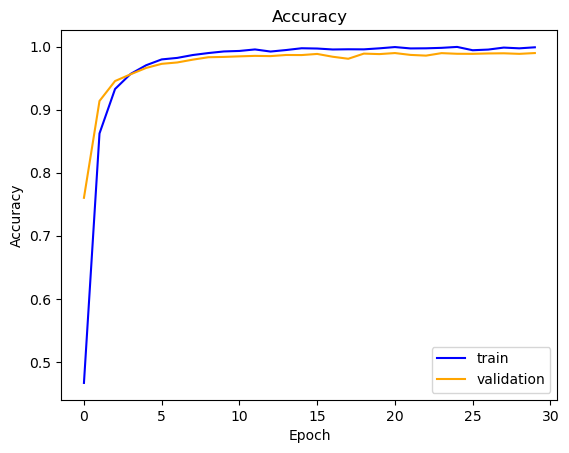

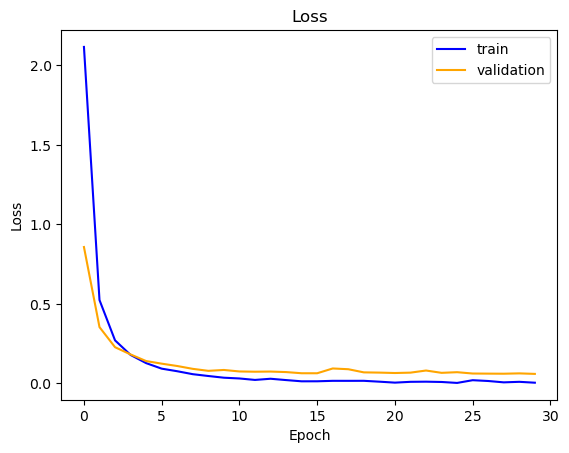

In [9]:
model.save('traffic_classifier.keras')

plt.figure()
plt.plot(history1.history['accuracy'], label='train', color='blue')
plt.plot(history1.history['val_accuracy'], label='validation', color='orange')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history1.history['loss'], label='train', color='blue')
plt.plot(history1.history['val_loss'], label='validation', color='orange')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
##This Block Not Mine, Took this Code Block from Kaggle for Using Dataset##
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv(r'D:\Soumil479\DNNs_On_FPGA\software_lenet\1\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open(r'D:/Soumil479/DNNs_On_FPGA/software_lenet/1/'+img)
        image = image.resize([32, 32])
        data.append(np.array(image))

X_test=np.array(data)

In [11]:
with tf.device('/GPU:0'):
    t0 = time.time()
    preds = np.argmax(model.predict(X_test, batch_size=128, verbose=1), axis=-1)
    t1 = time.time()

acc = accuracy_score(labels, preds)
print(f"Accuracy: {acc:.4f}")

total_time = t1 - t0
num_images = X_test.shape[0]
avg_time_per_image = (total_time / num_images) * 1000

print(f"Total inference time for {num_images} images: {total_time:.2f} seconds")
print(f"Average inference time per image: {avg_time_per_image:.4f} ms")

99/99 [==============================] - 1s 8ms/step
Accuracy: 0.9202
Total inference time for 12630 images: 1.14 seconds
Average inference time per image: 0.0905 ms


In [12]:
from tqdm import tqdm
num_images = len(X_test)
batch_size = 128
batch_times = []

total_start_time = time.time()

# Predict on test set in batches with timing and tqdm
predictions = []
for i in tqdm(range(0, num_images, batch_size)):
    batch = X_test[i:i+batch_size]
    batch_start_time = time.time()
    batch_preds = model.predict(batch, verbose=0)
    batch_end_time = time.time()
    batch_times.append(batch_end_time - batch_start_time)
    predictions.append(batch_preds)

total_end_time = time.time()

predictions = np.concatenate(predictions, axis=0)

# Total and average inference time
total_time = total_end_time - total_start_time
avg_time_per_image = (total_time / num_images) * 1000
print(f"\nTotal inference time for {num_images} images: {total_time:.2f} seconds")
print(f"Average inference time per image: {avg_time_per_image:.4f} ms")


100%|██████████| 99/99 [00:12<00:00,  7.68it/s]


Total inference time for 12630 images: 12.89 seconds
Average inference time per image: 1.0205 ms


In [13]:
import numpy as np

# ------------ helper: 4‑level brace block for 32×3×5×5 ------------
def conv4d_to_c(arr, indent="  "):
    O, I, _, _ = arr.shape          # 32, 3, 5, 5
    lines = ["{"]                   # outermost brace
    for o in range(O):
        lines.append(f"{indent}{{")            # kernel o
        for i in range(I):
            lines.append(f"{indent*2}{{")      # channel i
            for r in range(5):
                row = ", ".join(f"{v:.8e}f" for v in arr[o, i, r])
                lines.append(f"{indent*3}{{ {row} }},")
            lines.append(f"{indent*2}}},")
        lines.append(f"{indent}}},")
    lines.append("};")
    return "\n".join(lines)

# ------------ pull weights from Keras -----------------------------
k1, b1 = model.get_layer("CONV1").get_weights()   # (5,5,3,32)
k1 = k1.transpose(3, 2, 0, 1).astype(np.float32)  # → 32×3×5×5

with open("conv2d_layer1_weights.cpp", "w") as f:
    f.write('#include "conv2d_layer1.h"\n\n')

    f.write("const float CONV1_W[OUT_CH][IN_CH][K][K] = \n")
    f.write(conv4d_to_c(k1) + "\n\n")

    bias = ", ".join(f"{v:.8e}f" for v in b1)
    f.write(f"const float CONV1_B[OUT_CH] = {{ {bias} }};\n")

print("✓ conv2d_layer1_weights.cpp regenerated without ellipsis "
      "or syntax errors.")


✓ conv2d_layer1_weights.cpp regenerated without ellipsis or syntax errors.


In [14]:
import numpy as np

# ---------- pull weights from your Keras model ----------
k2, b2 = model.get_layer("CONV2").get_weights()   # (5,5,32,32)
k2 = k2.transpose(3, 2, 0, 1).astype(np.float32)  # → 32×32×5×5

# ---------- helper that guarantees 4 brace levels --------
def conv2_to_c(arr, indent="  "):                 # shape O×I×5×5
    O, I, _, _ = arr.shape
    text = ["{"]
    for o in range(O):
        text.append(f"{indent}{{")                # kernel level
        for i in range(I):
            text.append(f"{indent*2}{{")          # channel level
            for r in range(5):
                row = ", ".join(f"{v:.8e}f" for v in arr[o, i, r])
                text.append(f"{indent*3}{{ {row} }},")
            text.append(f"{indent*2}}},")
        text.append(f"{indent}}},")
    text.append("};")
    return "\n".join(text)

# ---------- write the C++ definition file ---------------
with open("conv2d_layer2_weights.cpp", "w") as f:
    f.write('#include "conv2d_layer2.h"\n\n')
    f.write("const float CONV2_W[OUT_CH_C2][IN_CH_C2][K_C2][K_C2] =\n")
    f.write(conv2_to_c(k2) + "\n\n")
    bias = ", ".join(f"{v:.8e}f" for v in b2)
    f.write(f"const float CONV2_B[OUT_CH_C2] = {{ {bias} }};\n")

print("✓ conv2d_layer2_weights.cpp regenerated with proper 4‑D braces")


✓ conv2d_layer2_weights.cpp regenerated with proper 4‑D braces


In [15]:
import numpy as np

# ---------- helper : 2‑D array to C braces -----------------
def mat_to_c(mat, indent="  "):          # mat : [OUT][IN]
    lines = ["{"]                        # outer brace
    for row in mat:
        body = ", ".join(f"{v:.8e}f" for v in row)
        lines.append(f"{indent}{{ {body} }},")
    lines.append("};")
    return "\n".join(lines)

# ---------- Dense‑1   (800 → 64, ReLU) ----------------------
w1, b1 = model.get_layer("FULLY1").get_weights()   # (800,64)
w1 = w1.T.astype(np.float32)                       # [64][800]

with open("dense_layer1_weights.cpp", "w") as f:
    f.write('#include "dense_layer1.h"\n\n')
    f.write("static const float D1_W[OUT_D1][IN_D1] =\n")
    f.write(mat_to_c(w1) + "\n\n")
    bias = ", ".join(f"{v:.8e}f" for v in b1)
    f.write(f"static const float D1_B[OUT_D1] = {{ {bias} }};\n")

# ---------- Dense‑2   (64 → 43, logits) ---------------------
w2, b2 = model.get_layer("FULLY2").get_weights()   # (64,43)
w2 = w2.T.astype(np.float32)                       # [43][64]

with open("dense_layer2_weights.cpp", "w") as f:
    f.write('#include "dense_layer2.h"\n\n')
    f.write("static const float D2_W[OUT_D2][IN_D2] =\n")
    f.write(mat_to_c(w2) + "\n\n")
    bias = ", ".join(f"{v:.8e}f" for v in b2)
    f.write(f"static const float D2_B[OUT_D2] = {{ {bias} }};\n")

print("✓ dense_layer1_weights.cpp and dense_layer2_weights.cpp written")


✓ dense_layer1_weights.cpp and dense_layer2_weights.cpp written


In [23]:
import numpy as np

# ---------------------------------------------------------------
# NEW helper – no truncation, long single lines are OK for the C
# ---------------------------------------------------------------
def to_c_array(arr, indent="  "):
    """
    Return a string like "{ {1.0f, 2.0f}, {3.0f, 4.0f} }" for any
    ndarray 'arr', with NO '...' ellipsis, formatted for C.
    """
    # force full printout
    flat_str = np.array2string(arr.flatten(),
                               separator=', ',
                               max_line_width=1000000,   # big
                               threshold=arr.size,       # never truncate
                               formatter={'float_kind':lambda x:f"{x:.8e}f"})
    # wrap the 1‑D string back into original shape’s braces
    # '['  → '{',   ']' → '}'
    flat_str = flat_str.replace('[', '{').replace(']', '}')
    # reshape braces according to ndarray shape
    def nest(s, shape):
        if len(shape) == 1:
            return s
        step = int(np.prod(shape[1:]))
        chunks = [nest(", ".join(s.split(", ")[i*step:(i+1)*step]), shape[1:])
                  for i in range(shape[0])]
        inner = ",\n".join(chunks)
        return "{\n" + indent + inner.replace("\n", "\n"+indent) + "\n}"
    return nest(flat_str, arr.shape)

# ------------------------------------------------------------------
# 1.  CONV1
# ------------------------------------------------------------------
k1,b1 = model.get_layer("CONV1").get_weights()      # (5,5,3,32)
k1 = k1.transpose(3,2,0,1)                          # [32][3][5][5]

with open("conv2d_layer1_weights.cpp", "w") as f:
    f.write('#include "conv2d_layer1.h"\n\n')
    f.write("static const float CONV1_W[OUT_CH][IN_CH][K][K] = ")
    f.write(to_c_array(k1) + ";\n\n")
    f.write("static const float CONV1_B[OUT_CH] = ")
    f.write(to_c_array(b1) + ";\n")

# ------------------------------------------------------------------
# 2.  CONV2
# ------------------------------------------------------------------
k2,b2 = model.get_layer("CONV2").get_weights()      # (5,5,32,32)
k2 = k2.transpose(3,2,0,1)                          # [32][32][5][5]

with open("conv2d_layer2_weights.cpp", "w") as f:
    f.write('#include "conv2d_layer2.h"\n\n')
    f.write("static const float CONV2_W[OUT_CH_C2][IN_CH_C2][K_C2][K_C2] = ")
    f.write(to_c_array(k2) + ";\n\n")
    f.write("static const float CONV2_B[OUT_CH_C2] = ")
    f.write(to_c_array(b2) + ";\n")

# ------------------------------------------------------------------
# 3.  Dense‑1
# ------------------------------------------------------------------
w1,b1d = model.get_layer("FULLY1").get_weights()    # (800,64)
w1 = w1.T                                           # [64][800]

with open("dense_layer1_weights.cpp", "w") as f:
    f.write('#include "dense_layer1.h"\n\n')
    f.write("static const float D1_W[OUT_D1][IN_D1] = ")
    f.write(to_c_array(w1) + ";\n\n")
    f.write("static const float D1_B[OUT_D1] = ")
    f.write(to_c_array(b1d) + ";\n")

# ------------------------------------------------------------------
# 4.  Dense‑2
# ------------------------------------------------------------------
w2,b2d = model.get_layer("FULLY2").get_weights()    # (64,43)
w2 = w2.T                                           # [43][64]

with open("dense_layer2_weights.cpp", "w") as f:
    f.write('#include "dense_layer2.h"\n\n')
    f.write("static const float D2_W[OUT_D2][IN_D2] = ")
    f.write(to_c_array(w2) + ";\n\n")
    f.write("static const float D2_B[OUT_D2] = ")
    f.write(to_c_array(b2d) + ";\n")

print("✓ 4 weight files regenerated without ellipsis.")


✓ 4 weight files regenerated without ellipsis.


In [27]:
import cv2, pathlib, os

img_path = "D:\Soumil479\DNNs_On_FPGA\software_lenet\1\Train\0\00000_00000_00000.png"              # <- your filename here
print("cwd  :", pathlib.Path().resolve())

img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"cv2.imread failed for '{img_path}'")

img = cv2.resize(img, (32, 32))
print("Loaded image shape:", img.shape)


cwd  : D:\Soumil479\DNNs_On_FPGA\software_lenet


FileNotFoundError: cv2.imread failed for 'D:\Soumil479\DNNs_On_FPGA\software_lenet\Train  00_00000_00000.png'

In [ ]:
model.save('traffic_classifier.keras')
weights = model.get_weights()
weights = model.get_weights()
np.savez('binaryweights_trained.npz', *weights)